In [ ]:
import tensorflow as tf
from tensorflow import keras
import pathlib
import PIL
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import imghdr
from tensorflow.keras.utils import to_categorical

In [ ]:
data_dir = pathlib.Path("/content/drive/MyDrive/Trabalho TEIA/Treino")

In [ ]:
#Quantidade de imagens existentes no material de treino
quant_imagens = len(list(data_dir.glob('*/*.jpg')))
print("Quantidade de imagens: ", quant_imagens)

Quantidade de imagens:  7571


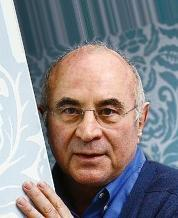

In [ ]:
DisplayPorto = list(data_dir.glob('Calvo/*'))
PIL.Image.open(str(DisplayPorto[98]))

In [ ]:
#Definindo os tamanhos de imagens a ser utilizado no treinamento
img_height = 178
img_width = 218
batch_size = 32

In [ ]:
#Passando o parametros de treinamento
dataset_treino = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size = batch_size
)

Found 11332 files belonging to 2 classes.
Using 9066 files for training.


In [ ]:
#Passando o parametros de validação
dataset_validacao = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size = batch_size
)

Found 11332 files belonging to 2 classes.
Using 2266 files for validation.


In [ ]:
#Amostragem das classes
class_names = dataset_treino.class_names
print(class_names)

['Calvo', 'Não Calvo']


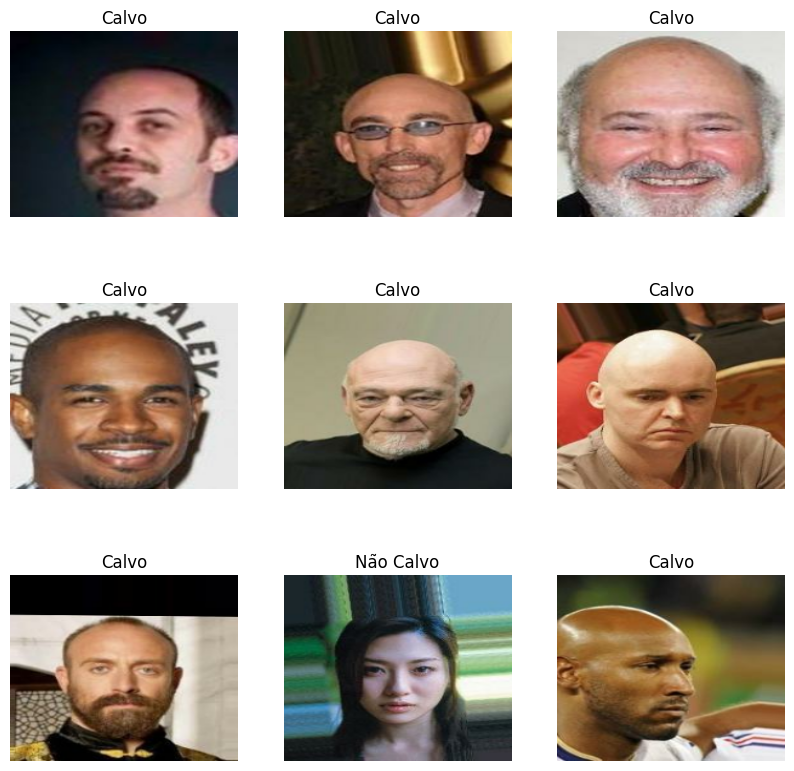

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in dataset_treino.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
num_classes = len(class_names)

In [ ]:
model = keras.models.Sequential([
  keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Dropout(0.2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.build()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 178, 218, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 178, 218, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 89, 109, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 89, 109, 32)       4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 44, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 44, 54, 64)       

In [ ]:
#Verificando o formatos das imagens
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

In [ ]:
# Extrair rótulos de treinamento e validação
y_train = []
for _, labels in dataset_treino:
    y_train.extend(labels.numpy())

y_validation = []
for _, labels in dataset_validacao:
    y_validation.extend(labels.numpy())

# Aplicar a conversão dos rótulos para codificação one-hot
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_validation_one_hot = tf.keras.utils.to_categorical(y_validation, num_classes=2)

In [ ]:
epochs = 10

history = model.fit(
    dataset_treino,
    validation_data=dataset_validacao,
    epochs=epochs
)

Epoch 1/10
284/284 [==============================] - 537s 2s/step - loss: 0.3067 - accuracy: 0.8730 - val_loss: 0.2466 - val_accuracy: 0.9162
Epoch 2/10
284/284 [==============================] - 513s 2s/step - loss: 0.1651 - accuracy: 0.9402 - val_loss: 0.1612 - val_accuracy: 0.9466
Epoch 3/10
284/284 [==============================] - 508s 2s/step - loss: 0.1202 - accuracy: 0.9563 - val_loss: 0.1840 - val_accuracy: 0.9303
Epoch 4/10
284/284 [==============================] - 516s 2s/step - loss: 0.1010 - accuracy: 0.9638 - val_loss: 0.1435 - val_accuracy: 0.9585
Epoch 5/10
284/284 [==============================] - 514s 2s/step - loss: 0.0760 - accuracy: 0.9731 - val_loss: 0.1966 - val_accuracy: 0.9537
Epoch 6/10
284/284 [==============================] - 507s 2s/step - loss: 0.0639 - accuracy: 0.9779 - val_loss: 0.1788 - val_accuracy: 0.9563
Epoch 7/10
284/284 [==============================] - 503s 2s/step - loss: 0.0481 - accuracy: 0.9818 - val_loss: 0.2029 - val_accuracy: 0.9537

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

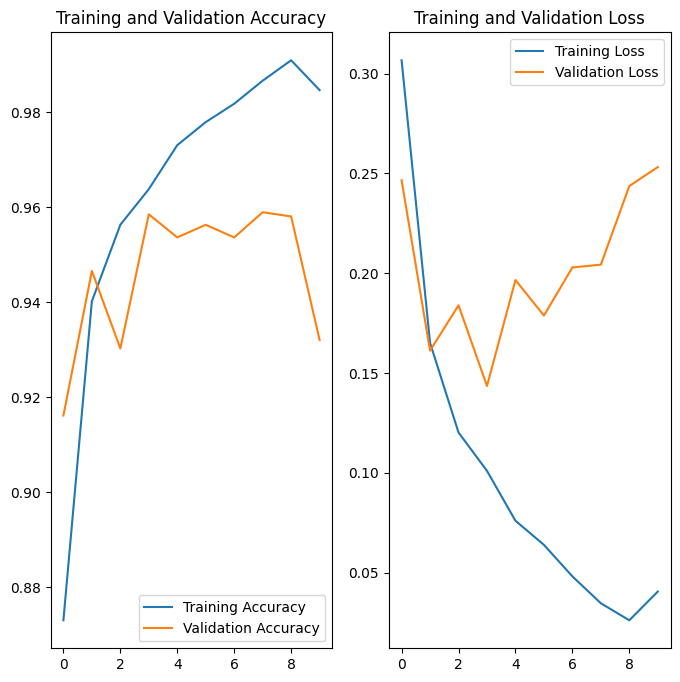

In [ ]:
#Montando o grafico do
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()